In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv('/content/email_classification_dataset.csv')

# Convert label to numeric
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

# Clean the email content
import re

def clean_email(text):
    text = re.sub(r'\n', ' ', text)  # Remove newline characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation/numbers
    text = text.lower()  # Convert to lowercase
    return text

df['clean_email'] = df['email'].apply(clean_email)


In [3]:
import re
from sklearn.model_selection import train_test_split

# Convert label to binary: spam = 1, ham = 0
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

# Clean email text: remove HTML tags, punctuation, and lowercase
def clean_email(text):
    text = re.sub(r'\n', ' ', text)  # Remove newlines
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation/numbers
    text = text.lower()  # Convert to lowercase
    return text

df['clean_email'] = df['email'].apply(clean_email)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['clean_email'], df['label_num'], test_size=0.2, random_state=42)


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train the model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Predict
y_pred = model.predict(X_test_tfidf)

# Evaluate
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1682
           1       1.00      1.00      1.00       318

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

[[1682    0]
 [   0  318]]


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train the model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Predict
y_pred = model.predict(X_test_tfidf)

# Evaluate
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1682
           1       1.00      1.00      1.00       318

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

[[1682    0]
 [   0  318]]


In [7]:
import numpy as np
feature_names = vectorizer.get_feature_names_out()
coefs = model.coef_[0]
top_positive = np.argsort(coefs)[-10:]
top_negative = np.argsort(coefs)[:10]

print("Top spam words:", feature_names[top_positive])
print("Top ham words:", feature_names[top_negative])


Top spam words: ['urgent' 'experience' 'claim' 'offer' 'products' 'click' 'delayed'
 'login' 'account' 'new']
Top ham words: ['software' 'team' 'survey' 'thank' 'feedback' 'regarding' 'best'
 'meeting' 'reminder' 'project']


In [8]:
import joblib
joblib.dump(model, 'spam_classifier_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [9]:
import numpy as np

feature_names = vectorizer.get_feature_names_out()
coefs = model.coef_[0]

# Top 10 words most indicative of spam
top_positive = np.argsort(coefs)[-10:]
# Top 10 words most indicative of ham
top_negative = np.argsort(coefs)[:10]

print("🔴 Top spam words:")
for idx in reversed(top_positive):
    print(f"{feature_names[idx]} (weight: {coefs[idx]:.4f})")

print("\n🟢 Top ham words:")
for idx in top_negative:
    print(f"{feature_names[idx]} (weight: {coefs[idx]:.4f})")


🔴 Top spam words:
new (weight: 2.5360)
account (weight: 2.2939)
login (weight: 2.0913)
delayed (weight: 1.9987)
click (weight: 1.9115)
products (weight: 1.8566)
offer (weight: 1.8566)
claim (weight: 1.7942)
experience (weight: 1.7602)
urgent (weight: 1.7387)

🟢 Top ham words:
software (weight: -2.3879)
team (weight: -2.2077)
survey (weight: -2.0496)
thank (weight: -2.0339)
feedback (weight: -1.7304)
regarding (weight: -1.7220)
best (weight: -1.6910)
meeting (weight: -1.6110)
reminder (weight: -1.6110)
project (weight: -1.6110)


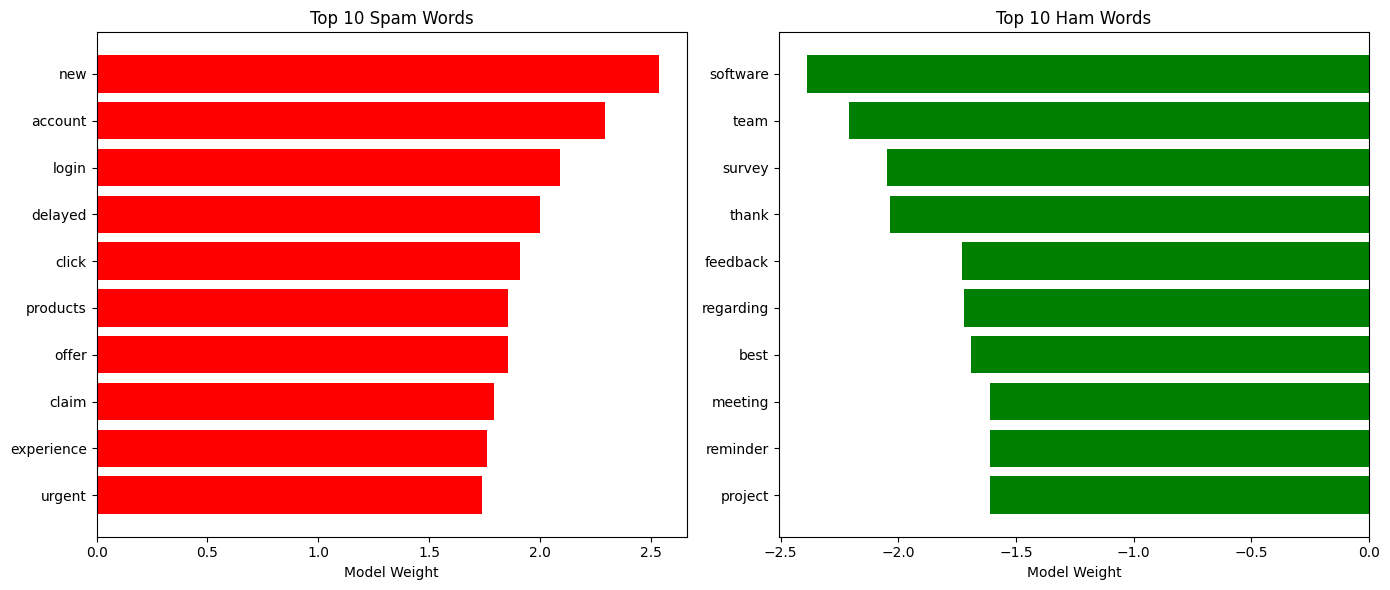

In [10]:
import matplotlib.pyplot as plt

# Get top feature names and weights
top_spam = [(feature_names[i], coefs[i]) for i in top_positive]
top_ham = [(feature_names[i], coefs[i]) for i in top_negative]

# Create bar plots
plt.figure(figsize=(14, 6))

# Spam Words
plt.subplot(1, 2, 1)
plt.barh([x[0] for x in top_spam], [x[1] for x in top_spam], color='red')
plt.title('Top 10 Spam Words')
plt.xlabel('Model Weight')

# Ham Words
plt.subplot(1, 2, 2)
plt.barh([x[0] for x in reversed(top_ham)], [x[1] for x in reversed(top_ham)], color='green')
plt.title('Top 10 Ham Words')
plt.xlabel('Model Weight')

plt.tight_layout()
plt.show()


In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

# Train Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Predict
y_pred_nb = nb_model.predict(X_test_tfidf)

# Evaluate
print("Naive Bayes Results:")
print(classification_report(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))


Naive Bayes Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1682
           1       1.00      1.00      1.00       318

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

[[1682    0]
 [   0  318]]


In [12]:
# Example custom input
sample_email = """Subject: Update Your Account Immediately

Your account has been flagged for suspicious activity. Please click the link below to verify your details."""

# Clean and vectorize
sample_cleaned = clean_email(sample_email)
sample_vector = vectorizer.transform([sample_cleaned])

# Predict
prediction = model.predict(sample_vector)[0]
print("Prediction:", "Spam" if prediction == 1 else "Ham")


Prediction: Spam
